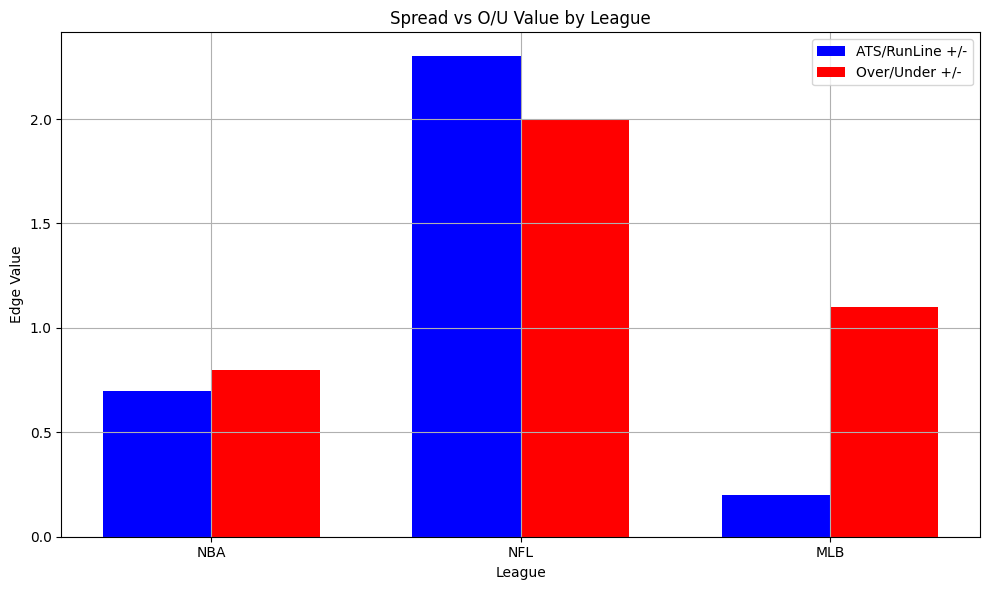

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# === Placeholder paths ===
nba_wl_path = '/workspaces/Data-Science-Final-Project/NBA/data/w_l_nba_ats.csv'
nfl_wl_path = '/workspaces/Data-Science-Final-Project/NBA/data/w_l_nfl_ats.csv'
mlb_wl_path = '/workspaces/Data-Science-Final-Project/NBA/data/w_l_mlb_ats.csv'

nba_ou_path = '/workspaces/Data-Science-Final-Project/NBA/data/nba_ou_trends_all_teams.csv'
nfl_ou_path = '/workspaces/Data-Science-Final-Project/NBA/data/nfl_ou_trends.csv'
mlb_ou_path = '/workspaces/Data-Science-Final-Project/NBA/data/MLB_Over_Under.csv'

# === Load win-loss and ATS/run line data ===
nba_df = pd.read_csv(nba_wl_path)
nfl_df = pd.read_csv(nfl_wl_path)
mlb_df = pd.read_csv(mlb_wl_path)

nba_ou = pd.read_csv(nba_ou_path)
nfl_ou = pd.read_csv(nfl_ou_path)
mlb_ou = pd.read_csv(mlb_ou_path)

# Extract first row assuming one team per file
nba_team = nba_df.iloc[0]
nfl_team = nfl_df.iloc[0]
mlb_team = mlb_df.iloc[0]

nba_ou_team = nba_ou.iloc[0]
nfl_ou_team = nfl_ou.iloc[0]
mlb_ou_team = mlb_ou.iloc[0]

# === Combine all data into one DataFrame ===
data = {
    'League': ['NBA', 'NFL', 'MLB'],
    'Team': [nba_team['Team'], nfl_team['Team'], mlb_team['Team']],
    'Win_PCT': [float(nba_team['Win_PCT']), float(nfl_team['Win_PCT']), float(mlb_team['Win_PCT'])],
    'MOV': [float(nba_team['MOV']), float(nfl_team['MOV']), float(mlb_team['MOV'])],
    'ATS_RunLine_PlusMinus': [float(nba_team['ATS_+/-']), float(nfl_team['ATS_+/-']), float(mlb_team['Run_Line_+/-'])],
    'Over_PCT': [float(nba_ou_team['Over']), float(nfl_ou_team['Over']), float(mlb_ou_team['Over'])],
    'Under_PCT': [float(nba_ou_team['Under']), float(nfl_ou_team['Under']), float(mlb_ou_team['Under'])],
    'Total_Diff': [float(nba_ou_team['Total_+/-']), float(nfl_ou_team['Total_+/-']), float(mlb_ou_team['Total_+/-'])]
}

df_combined = pd.DataFrame(data)

# === Visualization: ATS/Run Line and Over/Under Edges ===
"""plt.figure(figsize=(10, 6))
sns.barplot(data=df_combined, x='League', y='ATS_RunLine_PlusMinus', color='yellow', label='ATS/RunLine +/-')
sns.barplot(data=df_combined, x='League', y='Total_Diff', color='skyblue', label='O/U Total +/-', alpha=0.7)
plt.title('Betting Edge Comparison by League')
plt.ylabel('Betting Margin')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()"""

# === Optional: Side-by-side grouped bar plot ===
bar_width = 0.35
x = range(len(df_combined))

plt.figure(figsize=(10, 6))
plt.bar(x, df_combined['ATS_RunLine_PlusMinus'], width=bar_width, label='ATS/RunLine +/-', color='blue')
plt.bar([p + bar_width for p in x], df_combined['Total_Diff'], width=bar_width, label='Over/Under +/-', color='red')

plt.xlabel('League')
plt.ylabel('Edge Value')
plt.title('Spread vs O/U Value by League')
plt.xticks([p + bar_width / 2 for p in x], df_combined['League'])
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



Final Comparison Data:
  League  ATS_RunLine_PlusMinus  Total_Diff
0    NBA                    0.7         0.8
1    NFL                    2.3         2.0
2    MLB                    0.2         1.1


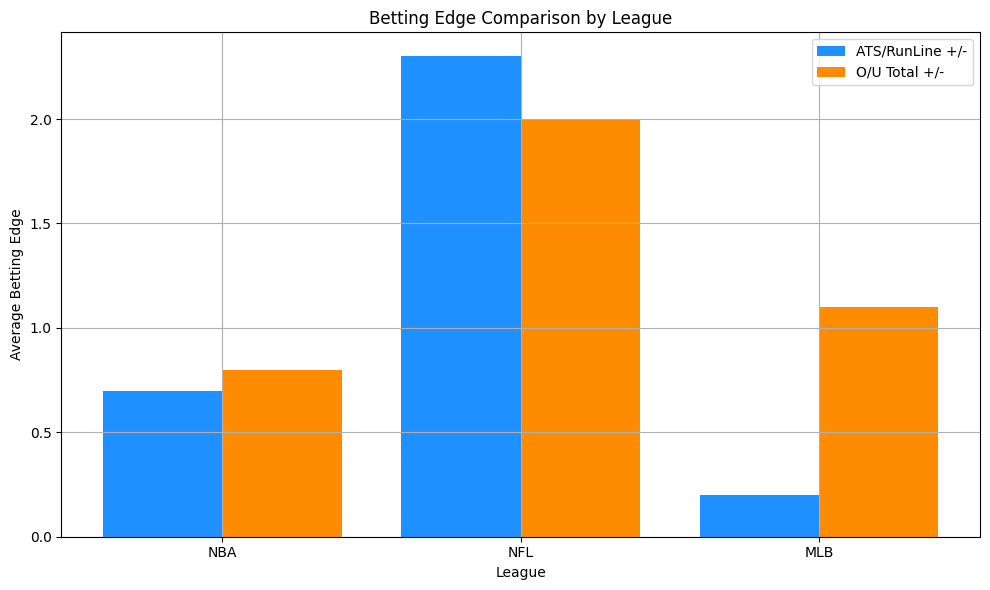

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# === Placeholder paths ===
nba_path = '/workspaces/Data-Science-Final-Project/NBA/data/w_l_nba_ats.csv'
nfl_path = '/workspaces/Data-Science-Final-Project/NBA/data/w_l_nfl_ats.csv'
mlb_path = '/workspaces/Data-Science-Final-Project/NBA/data/w_l_mlb_ats.csv'
nba_ou_path = '/workspaces/Data-Science-Final-Project/NBA/data/nba_ou_trends_all_teams.csv'
nfl_ou_path = '/workspaces/Data-Science-Final-Project/NBA/data/nfl_ou_trends.csv'
mlb_ou_path = '/workspaces/Data-Science-Final-Project/NBA/data/MLB_Over_Under.csv'

# Load data
nba_df = pd.read_csv(nba_path)
nfl_df = pd.read_csv(nfl_path)
mlb_df = pd.read_csv(mlb_path)
nba_ou = pd.read_csv(nba_ou_path)
nfl_ou = pd.read_csv(nfl_ou_path)
mlb_ou = pd.read_csv(mlb_ou_path)

# Select first row
nba_team = nba_df.iloc[0]
nfl_team = nfl_df.iloc[0]
mlb_team = mlb_df.iloc[0]
nba_ou_team = nba_ou.iloc[0]
nfl_ou_team = nfl_ou.iloc[0]
mlb_ou_team = mlb_ou.iloc[0]

# Combine data
data = {
    'League': ['NBA', 'NFL', 'MLB'],
    'Team': [nba_team['Team'], nfl_team['Team'], mlb_team['Team']],
    'Win_PCT': [float(nba_team['Win_PCT']), float(nfl_team['Win_PCT']), float(mlb_team['Win_PCT'])],
    'MOV': [float(nba_team['MOV']), float(nfl_team['MOV']), float(mlb_team['MOV'])],
    'ATS_RunLine_PlusMinus': [float(nba_team['ATS_+/-']), float(nfl_team['ATS_+/-']), float(mlb_team['Run_Line_+/-'])],
    'Over_PCT': [float(nba_ou_team['Over']), float(nfl_ou_team['Over']), float(mlb_ou_team['Over'])],
    'Under_PCT': [float(nba_ou_team['Under']), float(nfl_ou_team['Under']), float(mlb_ou_team['Under'])],
    'Total_Diff': [float(nba_ou_team['Total_+/-']), float(nfl_ou_team['Total_+/-']), float(mlb_ou_team['Total_+/-'])]
}

df_combined = pd.DataFrame(data)

# === Show comparison table ===
print("\nFinal Comparison Data:")
print(df_combined[['League', 'ATS_RunLine_PlusMinus', 'Total_Diff']])

# === Visualization ===
plt.figure(figsize=(10, 6))
bar_width = 0.4
x = np.arange(len(df_combined))

plt.bar(x, df_combined['ATS_RunLine_PlusMinus'], width=bar_width, label='ATS/RunLine +/-', color='dodgerblue')
plt.bar(x + bar_width, df_combined['Total_Diff'], width=bar_width, label='O/U Total +/-', color='darkorange')

plt.xticks(x + bar_width / 2, df_combined['League'])
plt.title('Betting Edge Comparison by League')
plt.ylabel('Average Betting Edge')
plt.xlabel('League')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
